
# Mechanics

You should produce a Jupyter notebook in answer to this assignment. You need to submit this notebook electronically as described below.

Place your notebook in a directory called iamlans and submit this directory using the submit command on a DICE machine. The format is:

submit iaml 4 iamlans

You can check the status of your submissions with the show_submissions command.

Late submissions: The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

Collaboration: You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

#### Dead Kernal
In case kernel does not connect, and shows a dead kernal meggese in read : 
- Go to Kernal -> Change kernal, and choose any of the available kernels.
- Press ctrl + s and close the tab.
- Open the notebook again and the kernel will connect. If it still does not connect then go to Kernel -> restart.

**Note : ** Accuracies may slightly vary due to randomness in train-text split. 

# Supervised Learning


In this project, we will apply all the machine learning classifiers on the given dataset. We will perform exploratory data analysis, visualisation and, finally, we learn how to perform classification tasks using Naive Bayes,Decision Trees, K-Nearest Neighbors, Linear SVC , Support Vector Classifier, Random Forest, Gradeint Decent, and Ada Boost Classifier,etc. For this, we will use some python packages and scikit-learn package (sklearn): a machine learning library for Python which works with numpy array, and pandas DataFrame objects.

Please Note: If you get confused, refer to the documentation and just ctrl+f for the object concerned:

- Scikit-learn API documentation
- Seaborn API documentation
- Matplotlib Pyplot documentation
- Pandas API documentation
- Numpy documentation


# Imports
In this project, you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [1]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import matplotlib
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, log_loss
import tools as t
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
%matplotlib inline


#### Clarification:

    The %matplotlib inline command is a special ipython built in magic command which forces the matplotlib plots to be rendered within the notebook.



# Description of the datasets


The Dataset is based on 4 small preprocessed datasets:
It contains 2225 documents

**classes.txt:** document id and the class id

**docs.txt: ** Description of the classes

**mtx.mtx:** 
It has three columns:

    column 0: the id of the term

    column 1: the id of the document

    column 2: counts/frequency

**terms.txt:** each row corresponds to a word/term (id is obviously the row number)

**Note: **Execute the cell below to load the csv into in a pandas DataFrame object.


### Load Dataset in Pandas DataFrame

In [2]:
# Loading dataset

#Column names for our dataset 
column_names = ['term_id','doc_id', 'counts', 'class']

#Reading Dataset into Pandas Dataframe
classification_data = pd.read_csv( "./dataset/mtx.mtx", sep="\s+", names=column_names)
classes_data  = pd.read_csv( "./dataset/classes.txt",sep="\s+", names=['doc_id', 'class_id'] )
#docs_data     = pd.read_csv("./dataset/docs.txt", sep="\s+", names = ['description'])


### Loading Pandas DataFrames into numpy arrays

In [5]:
#Loading Pandas DataFrames into numpy arrays becuase we need to get class-id from 'classes_data' dataframe on comparing
# 'doc_id' column in both first dataframes

data_array = np.asarray(classification_data[classification_data.columns])
classes_array = np.asarray(classes_data[classes_data.columns])
#docs_array = np.asarray(docs_data[docs_data.columns])

#Checking for nan entries
indx = np.isnan(data_array)

#replacing nan entries with 0
data_array[indx] = 0

for i in range(classes_array.shape[0]):
    indz = data_array[:,1]==classes_array[i,0]
    data_array[indz, 3] = classes_array[i,1]

#lets see our data numpy array
print data_array


[[  1.00000000e+00   1.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   7.00000000e+00   2.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   1.10000000e+01   1.00000000e+00   0.00000000e+00]
 ..., 
 [  9.63500000e+03   2.18400000e+03   1.00000000e+00   4.00000000e+00]
 [  9.63500000e+03   2.18600000e+03   1.00000000e+00   4.00000000e+00]
 [  9.63500000e+03   2.21800000e+03   1.00000000e+00   4.00000000e+00]]


We have now loaded the data. Let's get a feeling of what the data looks like by using the head() method.

In [53]:
classification_data['class'] = data_array[:,3]
classification_data.head(5) # Display the 5 first rows of the dataframe

,term_id,doc_id,counts,class
0,1,1,1.0,0.0
1,1,7,2.0,0.0
2,1,11,1.0,0.0
3,1,14,1.0,0.0
4,1,15,2.0,0.0


In [54]:
classes_data.head(5) # Display the 5 first rows of the dataframe

,doc_id,class_id
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


# Exploratory Data Analysis

In Exploratory Data Analysis, we plot graphs and charts to visualize how our data looks like. This is practically very helpful to get understanding about the data, relation among different features, how they affect each other, and which attributes are vital to build a learning model.

##### Histogram

A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc. An example of a histogram, and the raw data it was constructed from, is shown below:

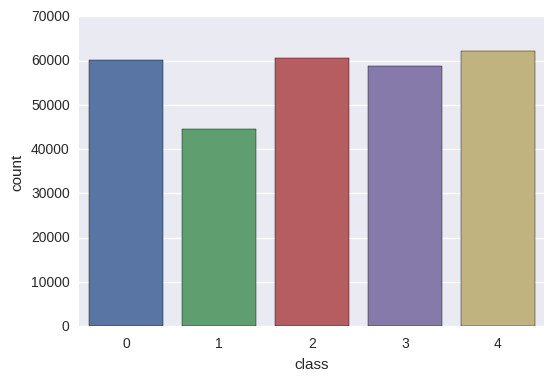

In [24]:
ax = sns.countplot(x='class', data=classification_data)
ax.set_xticklabels(['0', '1','2','3','4'])
ax.set_xlabel('class')
plt.show()

# Visualisation

Now we want to get a feeling for how the presence or absence of some specific terms could affect the outcome. 

## Lets Visualize the data

**Note: ** Here we are using seaborn pairplot function to see each across all other features

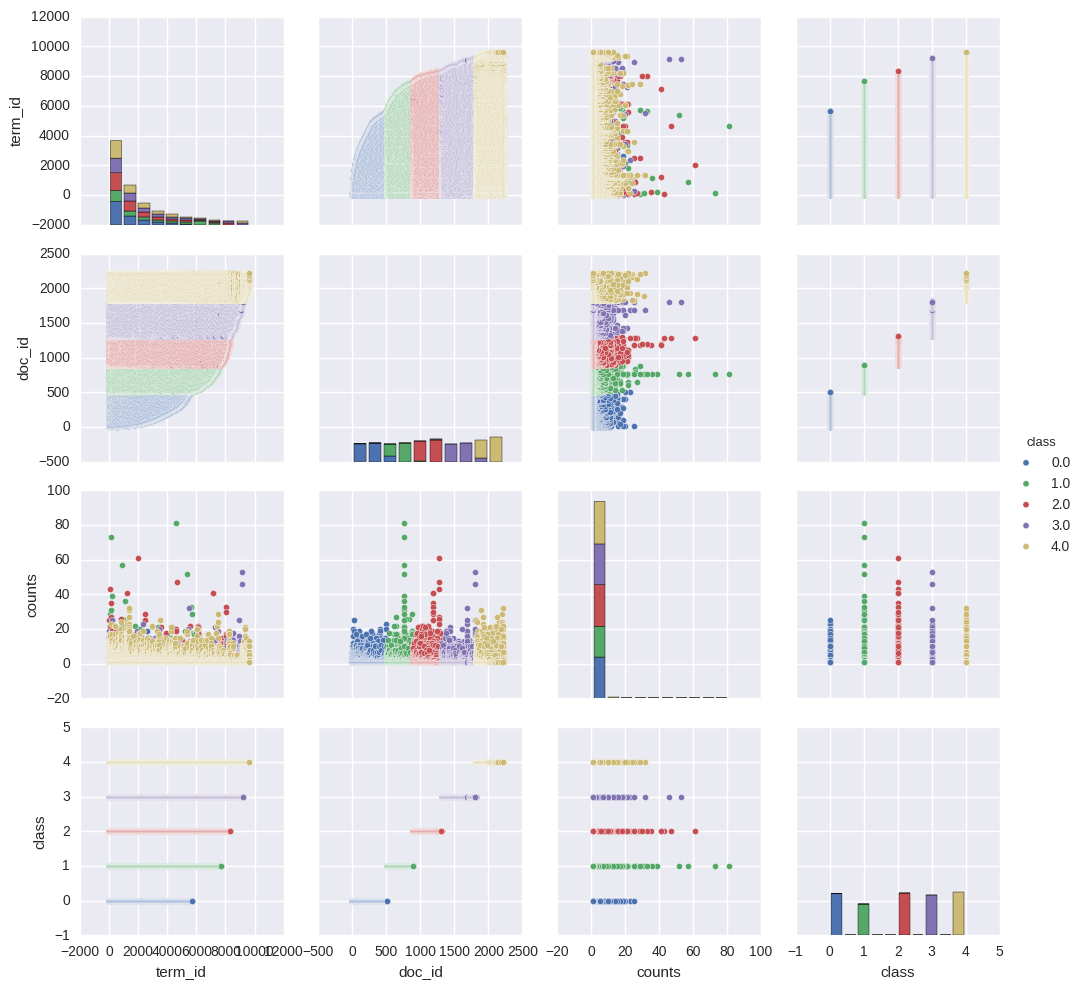

In [28]:
sns.pairplot(classification_data, hue="class")

Using seaborn, produce one figure with three countplots, one for each of the frequency variables for the words make.

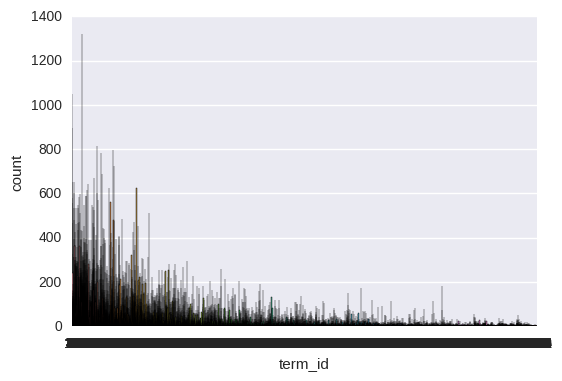

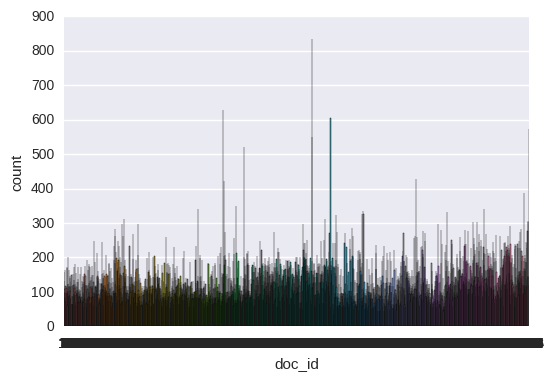

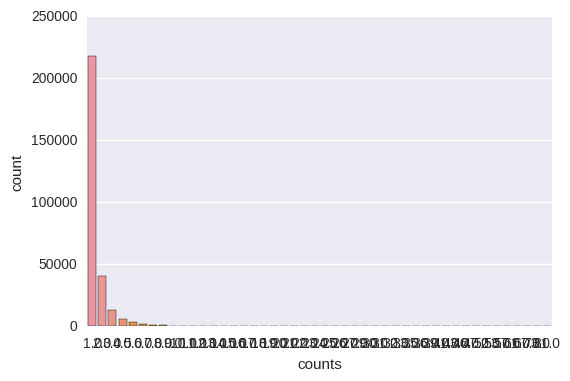

In [26]:
ax = sns.countplot(x='term_id', data=classification_data)
plt.show()

ax = sns.countplot(x='doc_id', data=classification_data)
plt.show()

ax = sns.countplot(x='counts', data=classification_data)
plt.show()

Repeat the above but split the bars showing the proportion of terms that belong to class 0/1/2/3/4. Hint: This only requires you to use the hue input argument to use different colours for the 'class' variable.

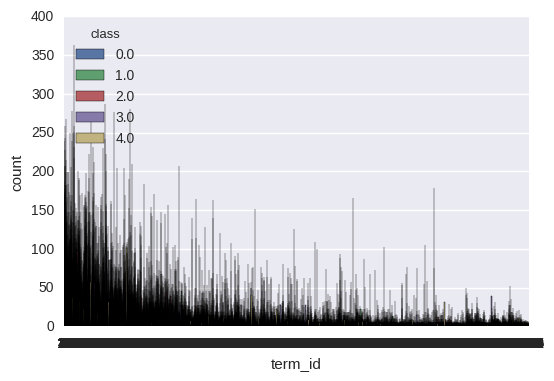

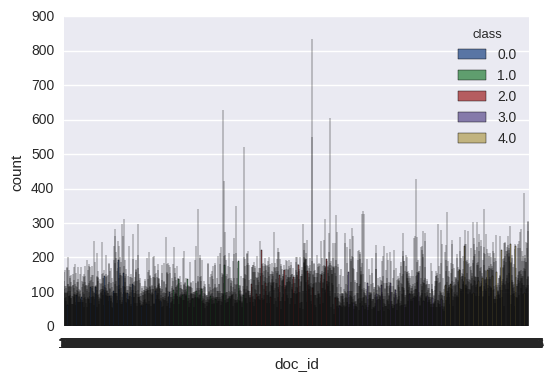

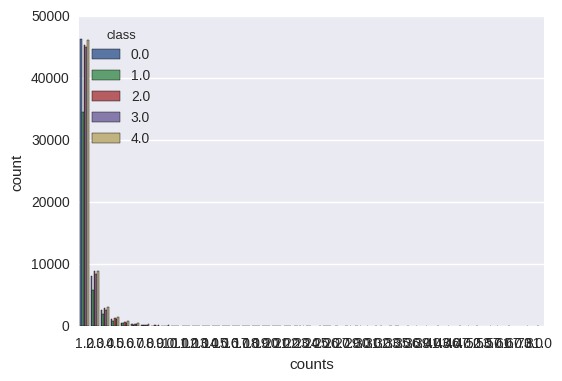

In [27]:
# Your code goes here
ax = sns.countplot(x='term_id', hue='class', data=classification_data)
plt.show()

ax = sns.countplot(x='doc_id', hue='class', data=classification_data)
plt.show()

ax = sns.countplot(x='counts', hue='class', data=classification_data)
plt.show()

In [40]:
print data_array[:,:-1].shape
print data_array[:,3].shape

(286774, 3)
(286774,)


In [45]:
#Lets plot the Complete data, with its covariance matrix...
# Remember seeing is believing
featnames=classification_data.columns
X = data_array[:,:-1]
Y = data_array[:,3]
t.plotCov(X,Y,labels=featnames.values[:-2])

# Applying Classifiers

Now we are in a position to apply all machine learning classifiers we studied in this course over the cleaned data. As discussed above, we'll prefer to use sklearn library in python which provides us a quality framework to apply classifiers with great efficiency. Lets discuss & apply all classifiers one by one. 

### Splitting Data into Trainig and Testing parts
We are splitting data into testing and training sets.
**Training Set:** Used to build the model
**Testing Set:**  Used to test the model

In [7]:

Xtrain, Xtest, ytrain, ytest = train_test_split(data_array[:,[0,1,2]],data_array[:,3],
                                                 random_state=10)
print np.isnan(Xtrain).sum(),np.isnan(Xtest).sum(),np.isnan(ytrain).sum(),np.isnan(ytest).sum() 

0 0 0 0


# Multinomial Naive Bayes classification


Given the transformed dataset, we now wish to train a Naïve Bayes classifier to distinguish each term belonging to class (0,1,2,3,4) from other terms in all documents by fitting a distribution of the number of occurrences of each word for all documents. Read about the Naive Bayes classifier and the underlying assumption if you are not already familiar with it. In this project we'll firts focus on the Multinomial Naive Bayes classifier.

We will make use of the MultinomialNB class in sklearn. Check out the user guide description and documentation to familiarise yourself with this class.

All classifiers in sklearn implement a fit() and predict() method. The first learns the parameters of the model and the latter classifies inputs. For a Naive Bayes classifier, the fit() method takes at least two input arguments X and y, where X are the input features and y are the labels associated with each example in the training dataset (i.e. targets).

As a first step we extract the input features and targets from the DataFrame. Now we want to train a Multinomial Naive Bayes classifier. Initialise a MultinomialNB object and fit the classifier using the X and y arrays extracted in the cell above.

In [8]:
# Creating Multinomial Naive Bayes Object
classifier = MultinomialNB()

# Now we are building our model
classifier.fit(Xtrain, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [9]:
# Predicting the Outcome
ypredicted = classifier.predict(Xtest)

#Calculating Mean Absolute Error 
mae = mean_absolute_error(ytest, ypredicted)

print "Accuracy = ", np.sum(ypredicted==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae


Accuracy =  0.30846374871
Mean Absolute Error: 1.34866237063


### Confusion Matrix

In [10]:

t.print_confusion_matrix(ypredicted.ravel(),ytest.ravel())

Predicted,0.0,1.0,2.0,3.0,4.0,All
Actual,,,,,,
0.0,7260,1552,1417,517,4416,15162
1.0,4206,1331,1107,584,3961,11189
2.0,2082,1747,1536,1189,8585,15139
3.0,2253,1606,1344,843,8657,14703
4.0,735,1262,1399,960,11145,15501
All,16536,7498,6803,4093,36764,71694


## Naive Bayes Algorithm

In [11]:
#Create a Gaussian Classifier
gb = GaussianNB()

# Train the model using the training sets 
gb.fit(Xtrain, ytrain)

#Predict Output 
ypredicted= gb.predict(Xtest)

#Calculating Mean Absolute Error 
mae = mean_absolute_error(ytest, ypredicted)

print "Accuracy = ", np.sum(ypredicted==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae
print "-------  Confusion Matrix -------"
t.print_confusion_matrix(ypredicted.ravel(),ytest.ravel())


Accuracy =  0.958769213602
Mean Absolute Error: 0.047549306776
-------  Confusion Matrix -------


Predicted,0.0,1.0,2.0,3.0,4.0,All
Actual,,,,,,
0.0,14751,260,0,0,151,15162
1.0,1419,9670,100,0,0,11189
2.0,0,136,14820,183,0,15139
3.0,0,0,412,14127,164,14703
4.0,0,0,0,131,15370,15501
All,16170,10066,15332,14441,15685,71694


## Decision Tree Classifier

In [6]:
from sklearn import tree

#Creating Decision Tree Classifier
clf = tree.DecisionTreeClassifier()

#Train the Model using dataset
clf.fit(Xtrain, ytrain)

#Predict the output
yfit = clf.predict(Xtest)

# Calculating Error in predictions
mae = mean_absolute_error(ytest, yfit)

print "Accuracy = ", np.sum(yfit==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae
print "-------  Confusion Matrix -------"
t.print_confusion_matrix(yfit.ravel(),ytest.ravel())


Accuracy =  1.0
Mean Absolute Error: 0.0
-------  Confusion Matrix -------


Predicted,0.0,1.0,2.0,3.0,4.0,All
Actual,,,,,,
0.0,15162,0,0,0,0,15162
1.0,0,11189,0,0,0,11189
2.0,0,0,15139,0,0,15139
3.0,0,0,0,14703,0,14703
4.0,0,0,0,0,15501,15501
All,15162,11189,15139,14703,15501,71694


## K Neighbors Classifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)


neigh.fit(Xtrain, ytrain)


ypredict = neigh.predict(Xtest)

#Evaluating the Error in predictions
mae =mean_absolute_error(ytest, ypredict)

print "Accuracy = ", np.sum(ypredict==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae
print "-------  Confusion Matrix -------"
t.print_confusion_matrix(ypredict.ravel(),ytest.ravel())


Accuracy =  0.994113872848
Mean Absolute Error: 0.0121209585181
-------  Confusion Matrix -------


Predicted,0.0,1.0,2.0,3.0,4.0,All
Actual,,,,,,
0.0,15039,13,0,0,110,15162
1.0,25,11129,35,0,0,11189
2.0,0,34,15088,17,0,15139
3.0,0,0,71,14590,42,14703
4.0,39,0,0,36,15426,15501
All,15103,11176,15194,14643,15578,71694


## Linear SVC Classifier

In [8]:
#Creating Instance of Linear SVC Classifier
lscv = LinearSVC()

#Training the model
lscv.fit(Xtrain, ytrain)

# Testing the model
ypredict = lscv.predict(Xtest)

#Evaluating the Error in predictions
mae =mean_absolute_error(ytest, ypredict)

print "Accuracy = ", np.sum(ypredict==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae
print "-------  Confusion Matrix -------"
t.print_confusion_matrix(ypredict.ravel(),ytest.ravel())

Accuracy =  0.377046893743
Mean Absolute Error: 0.884760230982
-------  Confusion Matrix -------


Predicted,0.0,2.0,All
Actual,,,
0.0,11893,3269,15162
1.0,193,10996,11189
2.0,0,15139,15139
3.0,0,14703,14703
4.0,0,15501,15501
All,12086,59608,71694


## Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=8)

#Train the Model using dataset
clf.fit(Xtrain, ytrain)

#Predict the output
yfit = clf.predict(Xtest)

# Calculating Error in predictions
mae = mean_absolute_error(ytest, yfit)

print "Accuracy = ", np.sum(yfit==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae
print "-------  Confusion Matrix -------"
t.print_confusion_matrix(yfit.ravel(),ytest.ravel())


Accuracy =  0.897062515692
Mean Absolute Error: 0.102979328814
-------  Confusion Matrix -------


Predicted,0.0,1.0,2.0,3.0,4.0,All
Actual,,,,,,
0.0,15161,0,0,0,1,15162
1.0,1,3825,7363,0,0,11189
2.0,0,0,15138,1,0,15139
3.0,0,0,13,14689,1,14703
4.0,0,0,0,0,15501,15501
All,15162,3825,22514,14690,15503,71694


## Gradient Boosting Classifier

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

#Train the Model using dataset
clf.fit(Xtrain, ytrain)

#Predict the output
yfit = clf.predict(Xtest)

# Calculating Error in predictions
mae = mean_absolute_error(ytest, yfit)

print "Accuracy = ", np.sum(yfit==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae
print "-------  Confusion Matrix -------"
t.print_confusion_matrix(yfit.ravel(),ytest.ravel())


Accuracy =  1.0
Mean Absolute Error: 0.0
-------  Confusion Matrix -------


Predicted,0.0,1.0,2.0,3.0,4.0,All
Actual,,,,,,
0.0,15162,0,0,0,0,15162
1.0,0,11189,0,0,0,11189
2.0,0,0,15139,0,0,15139
3.0,0,0,0,14703,0,14703
4.0,0,0,0,0,15501,15501
All,15162,11189,15139,14703,15501,71694


## Ada Boost Classifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()

#Train the Model using dataset
clf.fit(Xtrain, ytrain)

#Predict the output
yfit = clf.predict(Xtest)

# Calculating Error in predictions
mae = mean_absolute_error(ytest, yfit)

print "Accuracy = ", np.sum(yfit==ytest)/float(ytest.shape[0])
print "Mean Absolute Error:",mae
print "-------  Confusion Matrix -------"
t.print_confusion_matrix(yfit.ravel(),ytest.ravel())


Accuracy =  0.638854018467
Mean Absolute Error: 0.361145981533
-------  Confusion Matrix -------


Predicted,0.0,2.0,4.0,All
Actual,,,,
0.0,15162,0,0,15162
1.0,0,11189,0,11189
2.0,0,15139,0,15139
3.0,0,14703,0,14703
4.0,0,0,15501,15501
All,15162,41031,15501,71694
